In [1]:
import os
import re
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import custom_module as M

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# get master dict and convert to df
_dict = M.gather_dicts()
df = pd.DataFrame.from_dict(_dict)
df

,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,...,test19,test20,test21,test22,test23,test24,test25,test26,test27,test28
computer,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 4530s,...,Inspiron 13-5378,Inspiron 13-5378,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s,Inspiron 13-5378,HP ProBook 450 G5,Inspiron 13-5378,Dell System Inspiron N7110,HP ProBook 450 G5
data,"{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ...","{'time': ['11:06:16', '11:07:59', '11:11:08', ...","{'time': ['13:20:36', '13:25:25', '13:26:01', ...","{'time': ['16:29:26', '16:32:21', '16:34:55', ...",...,"{'time': ['20:43:00', '20:43:26', '20:45:09', ...","{'time': ['12:14:38', '12:15:51', '12:20:27', ...","{'time': ['12:58:07', '12:58:36', '13:03:25', ...","{'time': ['14:02:31', '14:05:38', '14:10:09', ...","{'time': ['15:16:49', '15:20:24', '15:24:12', ...","{'time': ['19:12:06', '19:13:22', '19:14:48', ...","{'time': ['18:57:49', '18:58:43', '19:01:42', ...","{'time': ['11:41:56', '11:45:05', '11:46:31', ...","{'time': ['11:27:06', '11:32:27', '11:36:39', ...","{'time': ['12:20:42', '12:24:41', '12:28:20', ..."
day,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10,...,2020-06-12,2020-06-13,2020-06-13,2020-06-13,2020-06-13,2020-06-13,2020-06-13,2020-06-14,2020-06-14,2020-06-14
location,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,...,upper east,upper west,upper east,lower west,lower west NEW,upper east,upper west,upper east,upper east,upper west


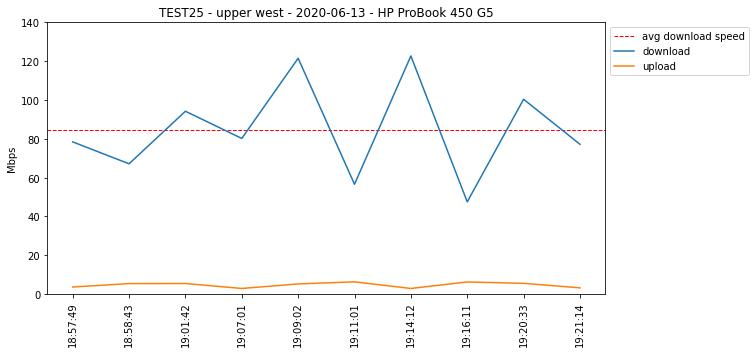

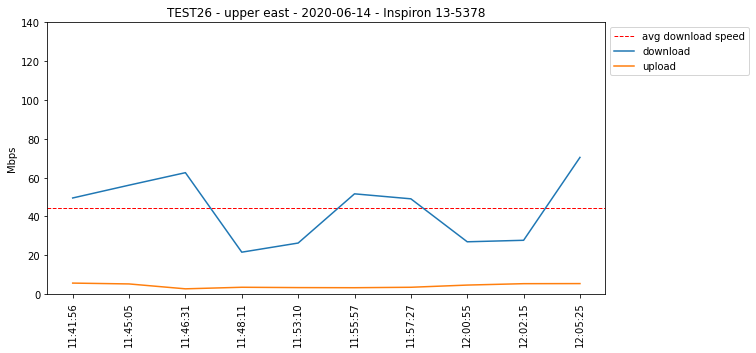

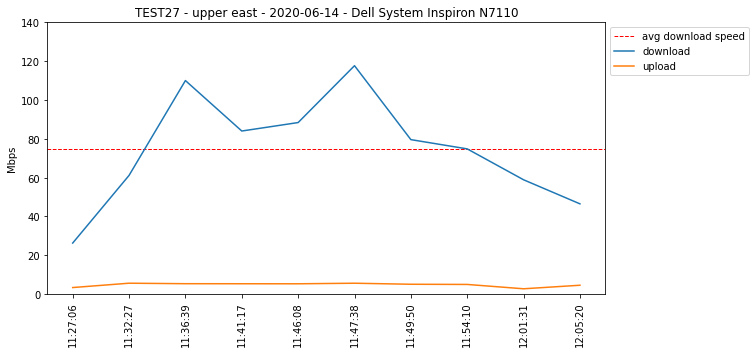

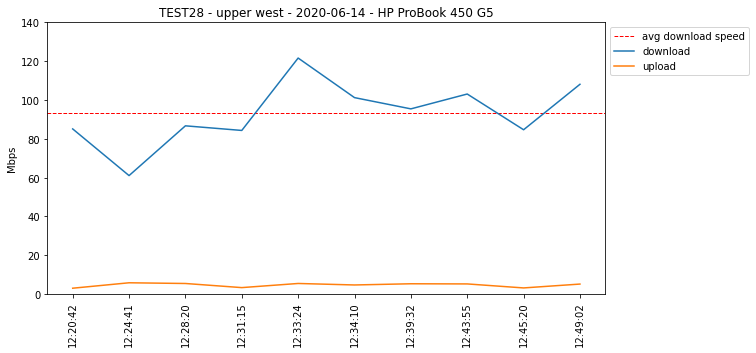

In [3]:
M.plot_single(df, 'test25');
M.plot_single(df, 'test26');
M.plot_single(df, 'test27');
M.plot_single(df, 'test28');

In [4]:
data = M.transform_data(df)
data

,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,...,upper east,upper west,upper east,lower west,lower west NEW,upper east,upper west,upper east,upper east,upper west
0,99.751580,41.039935,93.493913,66.902935,32.044196,66.419107,122.409275,24.492825,31.211880,32.814672,...,18.588056,43.798864,41.856740,43.092668,58.593486,52.924307,78.373506,49.485133,26.256596,85.058094
1,69.165935,47.908396,67.554907,109.046060,14.903680,61.665326,107.105495,29.259755,32.348858,18.641280,...,7.933640,61.898113,49.722467,33.420106,83.177536,26.753808,67.087704,56.081554,61.111176,61.016275
2,82.097260,41.205536,77.519773,75.464375,41.233320,37.660307,34.099353,46.525715,39.120474,14.031744,...,8.694836,53.549835,54.260856,77.607714,82.263593,42.888960,94.164055,62.518599,109.964235,86.649433
3,76.162253,49.155870,104.369230,80.596316,22.511722,55.285879,65.111738,37.090685,21.847185,15.798649,...,20.432004,21.076925,46.827994,48.858853,51.457700,57.502100,80.150975,21.567756,83.974715,84.271139
4,49.996191,70.795400,59.548327,56.638547,24.779011,11.976199,119.922186,66.819126,49.677905,40.156984,...,33.255824,35.553872,53.120251,70.179552,32.801772,69.846366,121.458752,26.273027,88.335140,121.562415
5,80.555113,25.725200,125.089836,85.813226,27.821760,12.257830,61.931694,32.642292,36.459608,48.074930,...,36.315992,63.803415,48.271980,50.651072,44.986142,45.351513,56.564480,51.617536,117.621934,101.177895
6,132.313207,50.335698,57.063406,107.269454,15.754265,44.757760,48.782933,70.483728,45.251242,23.157007,...,39.321488,67.488455,57.493984,64.060100,50.675471,42.066590,122.638476,49.052054,79.539292,95.383155
7,118.668693,33.906345,102.293335,92.528915,39.562590,54.784480,66.499452,43.154635,48.388661,49.213574,...,24.246971,36.191896,21.855815,69.339780,57.353136,43.507610,47.469679,26.917698,74.772396,103.035014
8,97.323495,61.458700,33.933635,89.636640,42.674279,20.726856,63.223840,75.289383,32.906248,55.514818,...,22.681044,34.648943,51.377295,66.123071,47.443467,50.127595,100.338439,27.693235,58.851078,84.627379
9,88.024754,48.716588,105.148166,121.669805,44.402936,30.362494,104.535887,24.037394,56.697534,35.752466,...,13.956912,38.140461,25.460835,61.106145,53.237558,29.884293,77.125899,70.392392,46.461475,108.048655


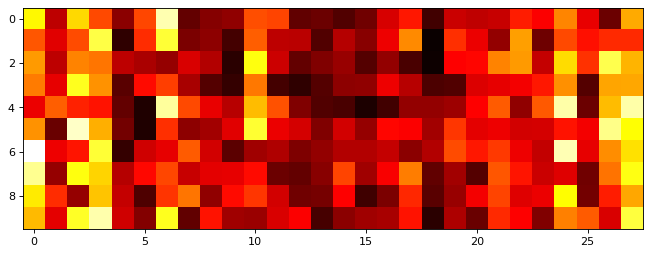

In [5]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

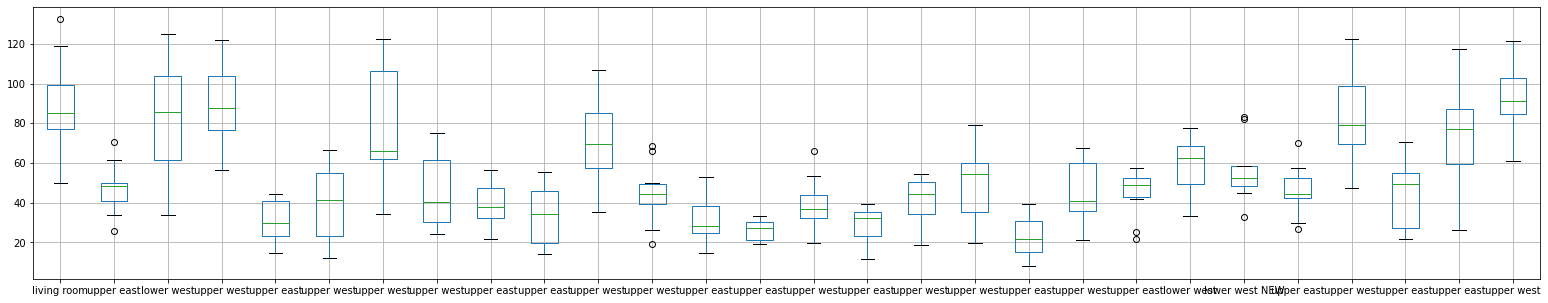

In [6]:
fig, ax = plt.subplots(ncols=1, figsize=(27,5))
ax.set_xticklabels(data.columns,  rotation=45, rotation_mode="anchor")
data.boxplot();

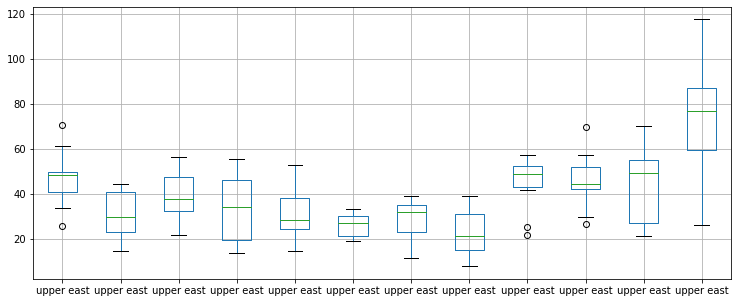

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(12.5,5))
data['upper east'].boxplot();

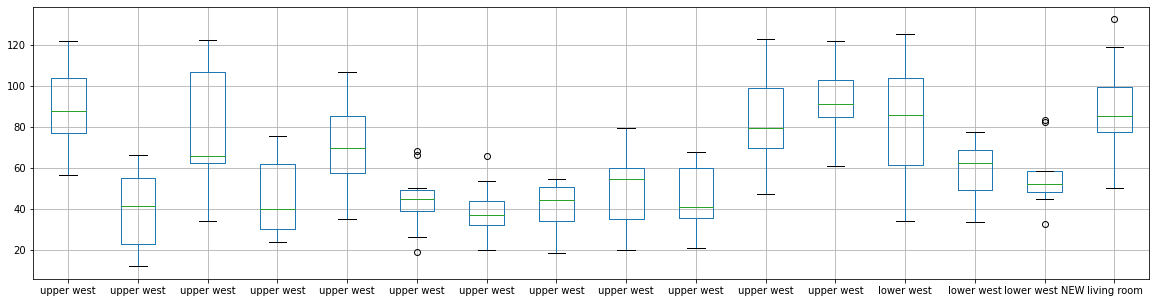

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(20,5))
data[['upper west','lower west', 'lower west NEW','living room']].boxplot();

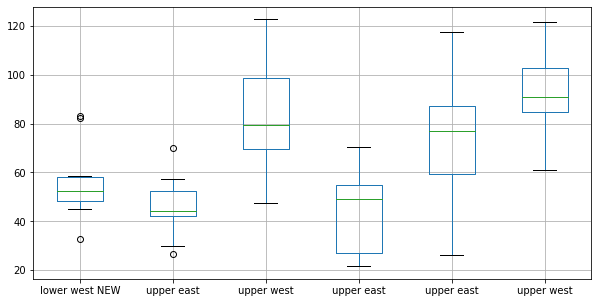

In [18]:
data.iloc[:,22:29].boxplot();